In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
from sklearn.cluster import KMeans

In [2]:
data=pd.ExcelFile(R"C:\Users\Name\Desktop\Python\CASE 3\University advancement dataset.xlsx")

In [3]:
dt=pd.read_excel(data,'Sheet1')

In [4]:
dt.head()

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID Number                       50000 non-null  int64  
 1   Title                           2490 non-null   object 
 2   Preferred Language              50000 non-null  object 
 3   Gender                          50000 non-null  object 
 4   Relationship Types              50000 non-null  object 
 5   Faculty of Graduation           50000 non-null  object 
 6   Year of Graduation              50000 non-null  int64  
 7   Province                        50000 non-null  object 
 8   Lifetime Giving                 50000 non-null  int64  
 9   Year of Last Gift               16086 non-null  float64
 10  Year of First Gift              16086 non-null  float64
 11  Largest Gift                    16088 non-null  float64
 12  Events Attended in Lifetime     

In [6]:
dt.shape

(50000, 16)

In [7]:
#Counting no. of missing values in each column

dt.isna().sum()

ID Number                             0
Title                             47510
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                 33914
Year of First Gift                33914
Largest Gift                      33912
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [8]:
#Checking all unique values in each column

dt.nunique()

ID Number                         50000
Title                                 3
Preferred Language                    3
Gender                                3
Relationship Types                   21
Faculty of Graduation                25
Year of Graduation                   81
Province                             12
Lifetime Giving                    7636
Year of Last Gift                    81
Year of First Gift                   81
Largest Gift                       6796
Events Attended in Lifetime          16
Past Traveler Y/N                     2
# of Instances of Volunteering        4
# of Clicks in the Past Month        36
dtype: int64

<AxesSubplot:>

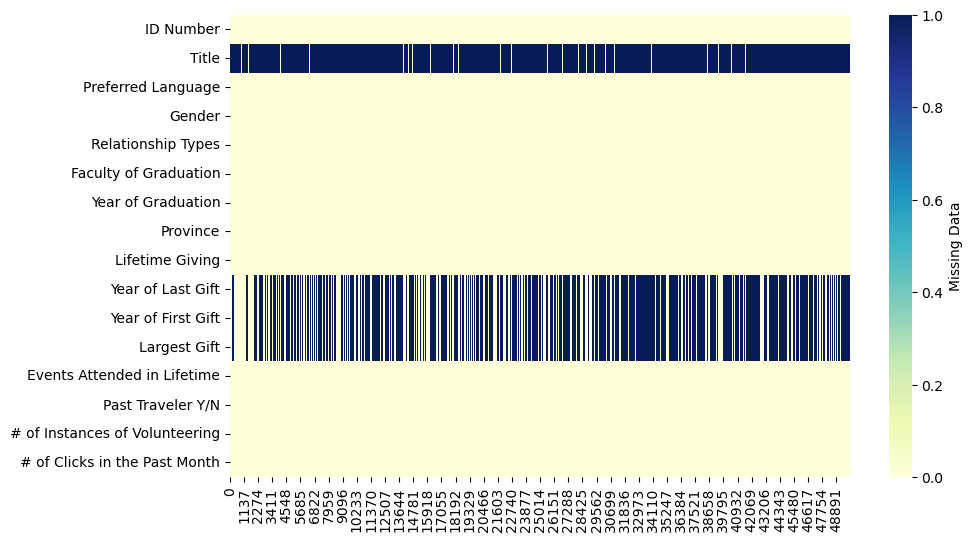

In [9]:
# null values visula;ization using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(dt.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [10]:
#sns.pairplot(dt,hue='Relationship Types',palette='bwr')

In [11]:
#removing  columns having missing values

dt1 = dt.copy()
dt1.drop(columns=['Title'],inplace=True)


In [12]:
dt1

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [13]:
#Filling missing values of languages using Nan 

dt1['Preferred Language'].replace(' ', np.nan, regex=True,inplace=True)
dt1['Year of Last Gift'].replace(' ', np.nan, regex=True,inplace=True)
dt1['Year of First Gift'].replace(' ', np.nan, regex=True,inplace=True)
dt1['Largest Gift'].replace(' ', np.nan, regex=True,inplace=True)

In [14]:
#Calculation of percentage null values
dt1['Preferred Language'].isnull().mean()

0.21868

In [15]:
dt1['Year of Last Gift'].isnull().mean()

0.67828

In [16]:
dt1['Year of First Gift'].isnull().mean()

0.67828

In [17]:
dt1['Largest Gift'].isnull().mean()

0.67824

# LOGISTIC REGRESSION

In [18]:
#Checking whether the person is donated

def donation(x):
    if x==0:
        return 0
    else:
        return 1

In [19]:
dt1['Donation'] = dt1['Lifetime Giving'].apply(lambda x : donation(x))

In [20]:
dt1.head()

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donation
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27,1
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19,1
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18,1
3,100004,NaN,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10,1
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16,1


In [23]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
dt1["Preferred Language"] = imp.fit_transform(dt1[["Preferred Language"]]).ravel()

In [24]:
dt1.drop(columns=['Year of Graduation','Largest Gift','Year of Last Gift','Year of First Gift'],inplace=True, axis=1)
dt1

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donation
0,100001,E,M,Graduate,Medicine -- General,ON,73600,0,N,0,27,1
1,100002,E,M,Graduate,Arts -- General,NB,8035,14,N,1,19,1
2,100003,E,F,Graduate,Science -- General,ON,9675,15,N,1,18,1
3,100004,E,M,Graduate,Education -- General,BC,4070,14,N,2,10,1
4,100005,E,M,Graduate,Management,QC,13377,0,N,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,ON,9174,15,Y,1,1,1
49996,149997,E,F,Graduate,Arts -- General,MB,38181,8,N,1,20,1
49997,149998,E,F,Graduate,Arts -- General,QC,0,3,Y,2,5,0
49998,149999,E,M,Graduate,Arts -- General,ON,0,1,N,0,12,0


In [25]:
#Converting Gender, Relationship Types, Preferred Language, Faculty of Graduation, Province, Past Traveler Y/N data into integer values

from sklearn.preprocessing import LabelEncoder

In [26]:
la_Gender = LabelEncoder()
la_preferred_Language = LabelEncoder()
la_Relationship_Types = LabelEncoder()
la_Faculty_of_Graduation = LabelEncoder()
la_Province = LabelEncoder()
la_Past_Traveler_YN = LabelEncoder()

In [27]:
dt1['Gender']=la_Gender.fit_transform(dt1['Gender'])
dt1['Preferred Language']=la_preferred_Language.fit_transform(dt1['Preferred Language'])
dt1['Relationship Types']=la_Relationship_Types.fit_transform(dt1['Relationship Types'])
dt1['Faculty of Graduation']=la_Faculty_of_Graduation.fit_transform(dt1['Faculty of Graduation'])
dt1['Province']=la_Province.fit_transform(dt1['Province'])
dt1['Past Traveler Y/N']=la_Past_Traveler_YN.fit_transform(dt1['Past Traveler Y/N'])

In [28]:
dt1

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donation
0,100001,0,1,0,16,7,73600,0,0,0,27,1
1,100002,0,1,0,3,3,8035,14,0,1,19,1
2,100003,0,0,0,22,7,9675,15,0,1,18,1
3,100004,0,1,0,9,1,4070,14,0,2,10,1
4,100005,0,1,0,14,9,13377,0,0,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,0,1,0,11,7,9174,15,1,1,1,1
49996,149997,0,0,0,3,2,38181,8,0,1,20,1
49997,149998,0,0,0,3,9,0,3,1,2,5,0
49998,149999,0,1,0,3,7,0,1,0,0,12,0


In [29]:
x = dt1.iloc[:, 0:11].values
x

array([[100001,      0,      1, ...,      0,      0,     27],
       [100002,      0,      1, ...,      0,      1,     19],
       [100003,      0,      0, ...,      0,      1,     18],
       ...,
       [149998,      0,      0, ...,      1,      2,      5],
       [149999,      0,      1, ...,      0,      0,     12],
       [150000,      0,      1, ...,      0,      3,     12]], dtype=int64)

In [30]:
y=dt1['Donation'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [32]:
from sklearn.linear_model import LogisticRegression

Logistic_regressor = LogisticRegression()

In [33]:
Logistic_regressor.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred = Logistic_regressor.predict(x_test)
y_pred 

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [35]:
Logistic_regressor.score(x_test,y_test)

0.9996

#Accuracy = 99.96%

# Clustering

In [36]:
import pkgs

In [37]:
# Import ElbowVisualizer

from yellowbrick.cluster import KElbowVisualizer

# Elbow Method for K means

In [41]:


model = KMeans()


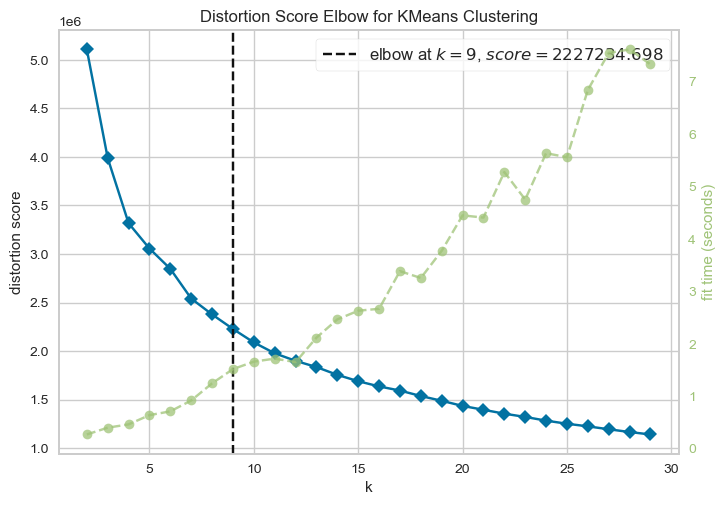

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)

# Fit data to visualizer
visualizer.fit(dt1[['Province','Faculty of Graduation','Donation','Past Traveler Y/N','Preferred Language','Gender','Events Attended in Lifetime','Past Traveler Y/N','Preferred Language','# of Clicks in the Past Month','Relationship Types']])        
visualizer.show()        # Finalize and render figure

# Silhouette Score for K means


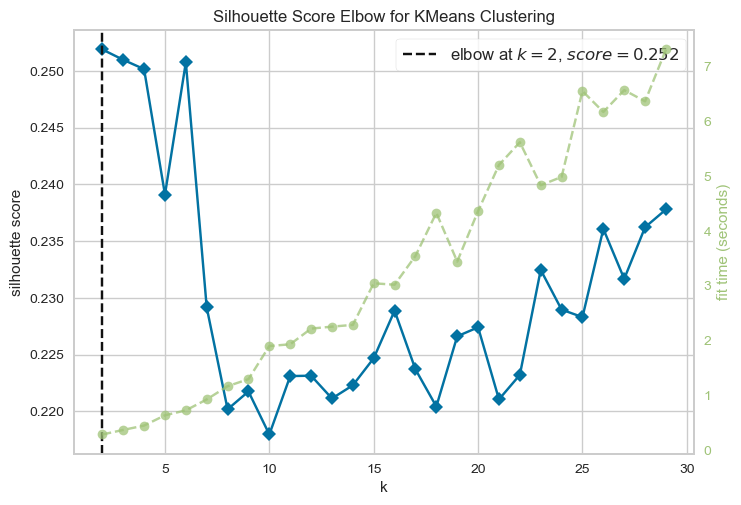

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
visualizer_silhouette = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)

 # Fit the data to the visualizer
visualizer_silhouette.fit(dt1[['Province','Faculty of Graduation','Donation','Past Traveler Y/N','Preferred Language','Gender','Events Attended in Lifetime','Past Traveler Y/N','Preferred Language','# of Clicks in the Past Month','Relationship Types']])
 
visualizer_silhouette.show()

                          
   

# Calinski Harabasz Score for K means

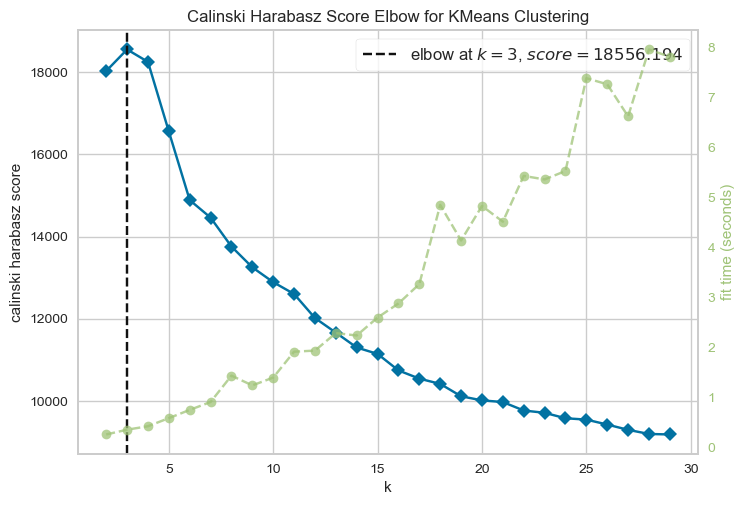

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [58]:
visualizer_calinski_harabasz = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)

# Fit the data to the visualizer
visualizer_calinski_harabasz.fit(dt1[['Province','Faculty of Graduation','Donation','Past Traveler Y/N','Preferred Language','Gender','Events Attended in Lifetime','Past Traveler Y/N','Preferred Language','# of Clicks in the Past Month','Relationship Types']])  

# Finalize and render the figure
visualizer_calinski_harabasz.show()        


#Hence K value can be taken as 2 from Silhouette Score

In [60]:
#Predicting clustering values

In [127]:
k = KMeans(n_clusters=2)

In [128]:
y1_pred = k.fit_predict(dt1[['Province','Faculty of Graduation','Donation','Past Traveler Y/N','Preferred Language','Gender','Events Attended in Lifetime','Past Traveler Y/N','Preferred Language','# of Clicks in the Past Month','Relationship Types']])

In [129]:
dt1['Cluster_prediction'] = y1_pred
dt1

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donation,Cluster_prediction
0,100001,0,1,0,16,7,73600,0,0,0,27,1,0
1,100002,0,1,0,3,3,8035,14,0,1,19,1,1
2,100003,0,0,0,22,7,9675,15,0,1,18,1,0
3,100004,0,1,0,9,1,4070,14,0,2,10,1,1
4,100005,0,1,0,14,9,13377,0,0,0,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,0,1,0,11,7,9174,15,1,1,1,1,0
49996,149997,0,0,0,3,2,38181,8,0,1,20,1,1
49997,149998,0,0,0,3,9,0,3,1,2,5,0,1
49998,149999,0,1,0,3,7,0,1,0,0,12,0,1


In [130]:
k.cluster_centers_

array([[ 5.56771835, 16.26240862,  0.34840323,  0.09538284,  0.13562909,
         0.46306272,  7.48757214,  0.09538284,  0.13562909, 12.13435937,
         0.85475183],
       [ 5.62848813,  4.11320283,  0.29283632,  0.08950437,  0.13748438,
         0.46509788,  7.50512287,  0.08950437,  0.13748438, 12.07392753,
         0.82044981]])

In [131]:
data1 = dt1[dt1.Cluster_prediction==0][dt1['Donation']==1]
data2 = dt1[dt1.Cluster_prediction==1][dt1['Donation']==1]

D:\Phyt\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\Phyt\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [132]:
data1['Faculty of Graduation'].value_counts()

14    2595
22    2194
11    1538
16     952
13     935
18     267
17     217
19     215
12      38
21      35
20      31
15      21
23      16
24       1
Name: Faculty of Graduation, dtype: int64

In [133]:
data2['Faculty of Graduation'].value_counts()

3     4678
9      697
6      302
1      295
7      282
10     223
8      223
4      182
0      134
5       10
2        5
Name: Faculty of Graduation, dtype: int64

In [134]:
data1['Province'].value_counts()

7     3021
9     2279
1     1270
0      856
3      630
5      311
10     265
2      262
4      108
8       34
6       11
11       8
Name: Province, dtype: int64

In [135]:
data2['Province'].value_counts()

7     2388
9     1845
1      894
0      673
3      465
5      226
10     215
2      202
4       84
8       30
6        6
11       3
Name: Province, dtype: int64

In [136]:
data1['Gender'].value_counts()

0    4851
1    4202
2       2
Name: Gender, dtype: int64

In [137]:
data2['Gender'].value_counts()

0    3759
1    3270
2       2
Name: Gender, dtype: int64

In [138]:
data1['Relationship Types'].value_counts()

0     8415
14     276
7      196
18      87
19      32
1       18
16      10
5        8
8        5
10       4
12       2
9        1
3        1
Name: Relationship Types, dtype: int64

In [139]:
data2['Relationship Types'].value_counts()

0     6538
14     194
7      152
18      69
1       30
19      17
8       10
5        9
16       7
12       2
6        1
2        1
9        1
Name: Relationship Types, dtype: int64

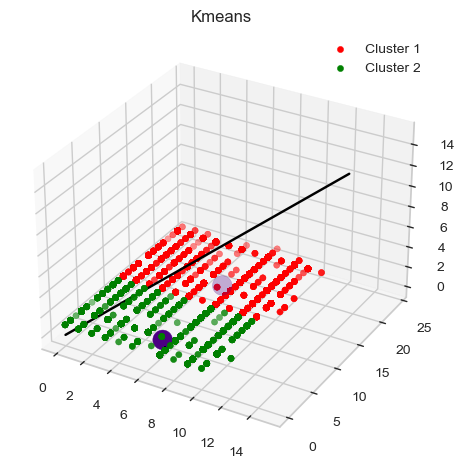

In [140]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1['Province'],data1['Faculty of Graduation'], data1['Donation'], c='red', label = 'Cluster 1')
kplot.scatter3D(data2['Province'],data2['Faculty of Graduation'], data2['Donation'],c ='green', label = 'Cluster 2')
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

In [141]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dt1[['Province','Faculty of Graduation','Donation','Past Traveler Y/N','Preferred Language','Gender','Events Attended in Lifetime','Past Traveler Y/N','Preferred Language','# of Clicks in the Past Month','Relationship Types']],y1_pred)
print(score)

0.2518955011181438
